In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cricDictionary = pd.read_csv('./data/DataDictionaryCricket.csv')
cricData = pd.read_csv('./data/ViratKohliODI.csv')

In [3]:
cricData.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [4]:
cricData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [5]:
cricData[cricData['Mins'] == '-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10
51,86*,-,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14


In [7]:
cricData['Not Out'] = cricData['Runs'].apply(lambda el: True if '*' in el else False)

In [8]:
cricData.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,False
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,False
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,False
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,False
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,False


In [9]:
tempData = pd.DataFrame()
tempData['Runs'] = cricData['Runs'].apply(lambda el: int(el.split('*')[0]) if '*' in el else int(el))

In [10]:
tempData.iloc[51]

Runs    86
Name: 51, dtype: int64

In [11]:
cricData['Runs'] = cricData['Runs'].apply(lambda el: int(el.split('*')[0]) if '*' in el else int(el))

In [12]:
cricData['Runs'].iloc[51]

86

In [13]:
tempData = cricData[cricData['Mins'] != '-']
tempData['Mins'] = tempData['Mins'].astype(int)

C:\Users\Soumya\AppData\Local\Temp\ipykernel_9780\3948165410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempData['Mins'] = tempData['Mins'].astype(int)


In [14]:
tempData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        126 non-null    int64 
 1   Mins        126 non-null    int32 
 2   BF          126 non-null    int64 
 3   4s          126 non-null    int64 
 4   6s          126 non-null    int64 
 5   SR          126 non-null    object
 6   Pos         126 non-null    int64 
 7   Dismissal   126 non-null    object
 8   Inns        126 non-null    int64 
 9   Opposition  126 non-null    object
 10  Ground      126 non-null    object
 11  Start Date  126 non-null    object
 12  Not Out     126 non-null    bool  
dtypes: bool(1), int32(1), int64(6), object(5)
memory usage: 12.4+ KB


In [15]:
totalMins = sum(tempData['Mins'])
totalBF = sum(tempData['BF'])

In [16]:
totalMins, totalBF

(8882, 6280)

In [17]:
avgMinPerBall = totalBF / totalMins
avgMinPerBall

0.7070479621706823

In [18]:
cricData['Mins'] = cricData[['Mins', 'BF']].apply(lambda el: int(el[1] * avgMinPerBall) if el[0] == '-' else int(el[0]), axis=1)

In [19]:
cricData.iloc[10]

Runs                  107
Mins                   80
BF                    114
4s                     11
6s                      1
SR                  93.85
Pos                     4
Dismissal          caught
Inns                    2
Opposition    v Sri Lanka
Ground            Kolkata
Start Date      24-Dec-09
Not Out             False
Name: 10, dtype: object

In [20]:
cricData['Start Date'] = pd.to_datetime(cricData['Start Date'])

In [21]:
cricData.head(2)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,False
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,False


In [22]:
cricData['Quarter'] = cricData['Start Date'].dt.quarter
cricData['Year'] = cricData['Start Date'].dt.year

In [23]:
cricData.head(2)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,False,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,False,3,2008


In [24]:
cricData = cricData[cricData['Year']!=0]

In [25]:
cricData['SR'] = cricData['SR'].apply(lambda el: 0 if el == '-' else el)

In [26]:
cricData['SR'] = cricData['SR'].astype(float)

In [27]:
cricData['SR'].iloc[15]

0.0

In [28]:
cricData

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,False,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,False,3,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,False,3,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,False,3,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,False,3,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,2016-10-26,False,4,2016
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,2016-10-29,False,4,2016
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,2017-01-15,False,1,2017
130,8,6,5,2,0,160.00,3,caught,1,v England,Cuttack,2017-01-19,False,1,2017


##### 1. Using the data set, find out the country against which Virat Kohli has the maximum batting average. Here, the batting average is given by (total number of runs Virat scored)/(the total number of matches he played) and not the average runs Virat Kohli scored before getting out.

In [29]:
groupByOppositon = cricData.groupby(['Opposition'])

In [30]:
battingAvgData = groupByOppositon.mean()

In [31]:
battingAvgData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, v Australia to v Zimbabwe
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Runs     11 non-null     float64
 1   Mins     11 non-null     float64
 2   BF       11 non-null     float64
 3   4s       11 non-null     float64
 4   6s       11 non-null     float64
 5   SR       11 non-null     float64
 6   Pos      11 non-null     float64
 7   Inns     11 non-null     float64
 8   Not Out  11 non-null     float64
 9   Quarter  11 non-null     float64
 10  Year     11 non-null     float64
dtypes: float64(11)
memory usage: 1.0+ KB


In [32]:
battingAvgData['Runs'].index, battingAvgData['Runs'].values

(Index(['v Australia', 'v Bangladesh', 'v England', 'v Ireland',
        'v Netherlands', 'v New Zealand', 'v Pakistan', 'v South Africa',
        'v Sri Lanka', 'v West Indies', 'v Zimbabwe'],
       dtype='object', name='Opposition'),
 array([49.95      , 68.        , 39.52380952, 34.        , 12.        ,
        62.64285714,  5.5       , 37.2       , 45.16666667, 53.10526316,
        43.        ]))

In [34]:
battingAvgObj = {
    'Opposition': [],
    'Avg Runs': []
}
for i in battingAvgData.index:
    battingAvgObj['Opposition'].append(i)
    battingAvgObj['Avg Runs'].append(battingAvgData.loc[i]['Runs'])

In [35]:
battingAvgObj

{'Opposition': ['v Australia',
  'v Bangladesh',
  'v England',
  'v Ireland',
  'v Netherlands',
  'v New Zealand',
  'v Pakistan',
  'v South Africa',
  'v Sri Lanka',
  'v West Indies',
  'v Zimbabwe'],
 'Avg Runs': [49.95,
  68.0,
  39.523809523809526,
  34.0,
  12.0,
  62.642857142857146,
  5.5,
  37.2,
  45.166666666666664,
  53.10526315789474,
  43.0]}

In [33]:
battingAvgDf = pd.DataFrame({'Opposition': battingAvgData['Runs'].index, 'Avg Runs': battingAvgData['Runs'].values})

In [34]:
battingAvgDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opposition  11 non-null     object 
 1   Avg Runs    11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


In [35]:
battingAvgDf.iloc[battingAvgDf['Avg Runs'].idxmax()]

Opposition    v Bangladesh
Avg Runs              68.0
Name: 1, dtype: object

##### 2. Plot a histogram to see where Virat Kohli has scored the most number of times.

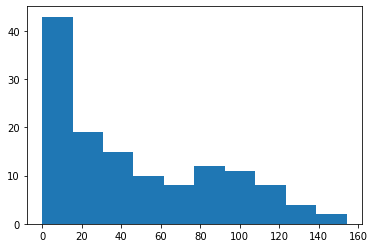

In [36]:
plt.hist(cricData['Runs'])
plt.show()

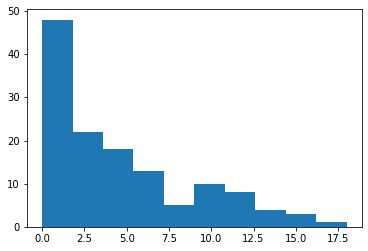

In [38]:
plt.hist(cricData['4s'])
plt.show()

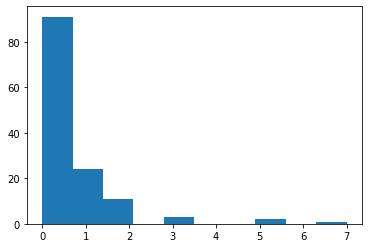

In [39]:
plt.hist(cricData['6s'])
plt.show()

##### 3. Whenever Virat Kohli has scored 90-100 runs (exclude 100), what has been the average strike rate?

In [40]:
runs90to100Df = cricData[cricData['Runs'] >= 90]
runs90to100Df = runs90to100Df[runs90to100Df['Runs'] < 100]

In [41]:
runs90to100Df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
11,91,136,102,7,0,89.21,3,caught,2,v Bangladesh,Dhaka,2010-01-07,False,1,2010
44,94,135,104,10,0,90.38,3,run out,1,v West Indies,Kingston,2011-06-16,False,2,2011
88,99,159,100,9,0,99.00,3,caught,1,v West Indies,Visakhapatnam,2013-11-24,False,4,2013
119,91,148,97,9,1,93.81,3,caught,1,v Australia,Perth,2016-01-12,False,1,2016


In [42]:
runs90to100Df['SR'].sum() / len(runs90to100Df['SR'])

93.1

In [43]:
runs90to100Df['SR'].mean()

93.1

##### 4. Plot a pie chart to find out the approximate percentage of the times Virat Kohli has been out by different ways in all his innings. Take into account all his innings, including the ones in which he remained not out.

In [44]:
groupByDismissal = cricData.groupby(['Dismissal']).count()['Runs']
groupByDismissal

Dismissal
bowled        10
caught        84
hit wicket     1
lbw            9
not out       17
run out       10
stumped        1
Name: Runs, dtype: int64

In [46]:
totalBowled = groupByDismissal.loc['bowled']
totalCaught = groupByDismissal.loc['caught']
totalHitW = groupByDismissal.loc['hit wicket']
totalLbw = groupByDismissal.loc['lbw']
totalNotOut = groupByDismissal.loc['not out']
totalRunOut = groupByDismissal.loc['run out']
totalStumped = groupByDismissal.loc['stumped']
totalInnings = groupByDismissal.sum()

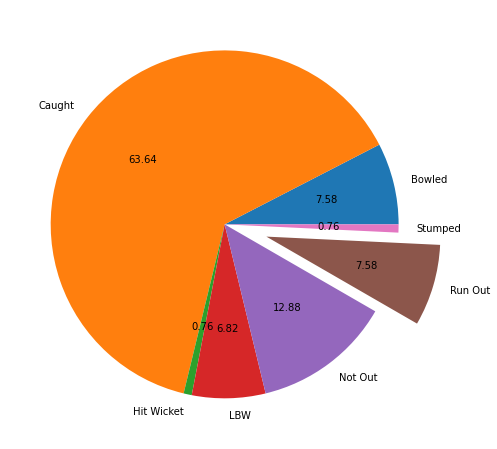

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(x=[totalBowled, totalCaught, totalHitW, totalLbw, totalNotOut, totalRunOut, totalStumped], labels= ['Bowled', 'Caught', 'Hit Wicket', 'LBW', 'Not Out', 'Run Out', 'Stumped'], autopct='%.2f', explode=[0, 0, 0, 0, 0, 0.25, 0])
plt.show()

##### 5. Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

a) 100-120 b) 120-140 c) 140-160 d) 160-180

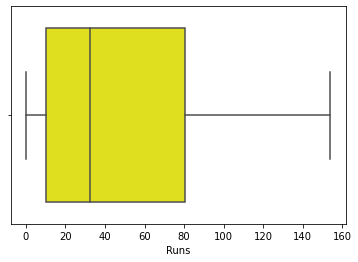

In [62]:
sns.boxplot(x='Runs', data=cricData, color='yellow')
plt.show()

**ANS: Option C.**

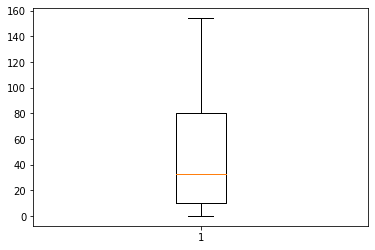

In [49]:
plt.boxplot(cricData['Runs'])
plt.show()

In [52]:
cricData['Runs'].quantile(0.50)

32.5

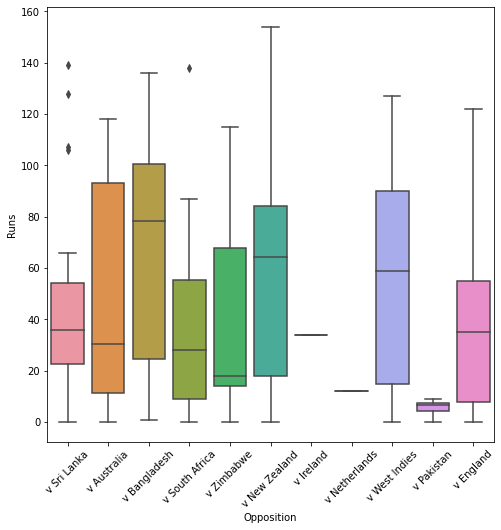

In [53]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Opposition', y='Runs', data=cricData)
plt.xticks(rotation=45)
plt.show()

In [54]:
cricData['Runs'].median()

32.5

In [55]:
q25 = cricData['Runs'].quantile(q=0.25, interpolation='midpoint')
q75 = cricData['Runs'].quantile(q=0.75, interpolation='midpoint')
q25, q75

(10.0, 80.5)

In [56]:
iqr25to75 = q75 - q25
iqr25to75

70.5

##### 6. Consider the following statements and choose the correct option
1. Virat has played the maximum number of matches in 2011
2. Virat has the highest run average in the year 2017 
3. Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

In [57]:
cricData['Year'].value_counts().idxmax()

2011

In [58]:
battingAvgPerYear = cricData.groupby(['Year']).mean()['Runs']

In [59]:
battingAvgPerYear

Year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64

In [60]:
battingAvgPerYear.index, battingAvgPerYear.values

(Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='Year'),
 array([31.8       , 38.33333333, 45.375     , 42.        , 40.36363636,
        47.82608696, 58.52941176, 30.4       , 73.9       , 61.66666667]))

In [56]:
battingAvgObjPerYear = {
    'Year': [],
    'Avg Runs': []
}
for i in battingAvgPerYear.index:
    battingAvgObjPerYear['Year'].append(i)
    battingAvgObjPerYear['Avg Runs'].append(battingAvgPerYear.loc[i]['Runs'])

In [57]:
battingAvgObjPerYear

{'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
 'Avg Runs': [31.8,
  38.333333333333336,
  45.375,
  42.0,
  40.36363636363637,
  47.82608695652174,
  58.529411764705884,
  30.4,
  73.9,
  61.666666666666664]}

In [61]:
battingAvgObjPerYearDf = pd.DataFrame({'Year': battingAvgPerYear.index, 'Avg Runs': battingAvgPerYear.values})
battingAvgObjPerYearDf

,Year,Avg Runs
0,2008,31.800000
1,2009,38.333333
2,2010,45.375000
3,2011,42.000000
4,2012,40.363636
5,2013,47.826087
6,2014,58.529412
7,2015,30.400000
8,2016,73.900000
9,2017,61.666667


In [62]:
battingAvgObjPerYearDf.loc[battingAvgObjPerYearDf['Avg Runs'].idxmax()]

Year        2016.0
Avg Runs      73.9
Name: 8, dtype: float64

In [63]:
runsPerYear = cricData.groupby(['Year']).max()['Runs']

In [64]:
runsPerYear

Year
2008     54
2009    107
2010    118
2011    117
2012    128
2013    115
2014    139
2015    138
2016    154
2017    122
Name: Runs, dtype: int64

In [65]:
runsPerYear.index, runsPerYear.values

(Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='Year'),
 array([ 54, 107, 118, 117, 128, 115, 139, 138, 154, 122], dtype=int64))

In [64]:
runsPerYearObj = {
    'Year': [],
    'Max Runs': []
}
for i in runsPerYear.index:
    runsPerYearObj['Year'].append(i)
    runsPerYearObj['Max Runs'].append(runsPerYear.loc[i]['Runs'])

In [66]:
runsPerYearDf = pd.DataFrame({'Year': runsPerYear.index, 'Max Runs': runsPerYear.values})

In [67]:
runsPerYearDf.loc[runsPerYearDf['Max Runs'].idxmax()]

Year        2016
Max Runs     154
Name: 8, dtype: int64

**ANS: Option B. is only FALSE**

##### 7. Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

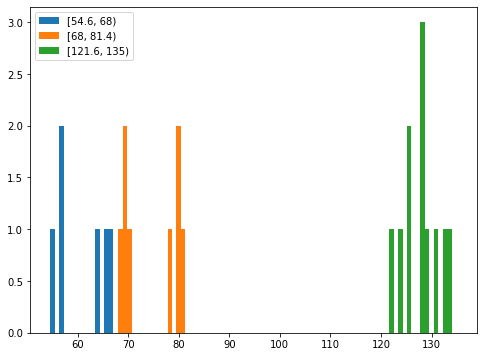

In [68]:
plt.figure(figsize=(8,6))
plt.hist(x=cricData['Mins'], range=[54.6, 67.9], bins=15)
plt.hist(x=cricData['Mins'], range=[68, 81.3], bins=15)
plt.hist(x=cricData['Mins'], range=[121.6, 134.9], bins=15)
plt.legend(['[54.6, 68)', '[68, 81.4)', '[121.6, 135)'])
plt.show()

**ANS: Option C.**

##### 8. Pie chart of Out vs Not Out 

In [72]:
outNotOutData = cricData.groupby(['Not Out']).count()['Runs']

In [73]:
outNotOutDf = pd.DataFrame({'Class': outNotOutData.index, 'Count': outNotOutData.values})
outNotOutDf

,Class,Count
0,False,115
1,True,17


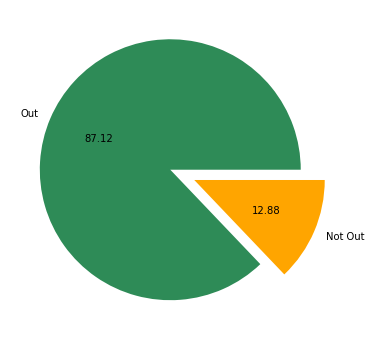

In [74]:
plt.figure(figsize=(6,6))
plt.pie(x=outNotOutDf['Count'], labels=['Out', 'Not Out'], autopct='%.2f', explode=[0, 0.2], colors=['seagreen', 'orange'])
plt.show()

##### Avg runs per ground

In [75]:
avgRunsPerGround = cricData.groupby(['Ground']).mean()['Runs']
avgRunsPerGround

Ground
Adelaide               18.000000
Ahmedabad              37.500000
Bengaluru              11.333333
Birmingham             22.000000
Brisbane               35.500000
Bulawayo                0.000000
Canberra              106.000000
Cape Town              28.000000
Cardiff                53.500000
Centurion               2.000000
Chennai                55.800000
Colombo (RPS)          46.333333
Cuttack                11.000000
Dambulla               20.666667
Delhi                  40.400000
Dhaka                  58.285714
Dharamsala             70.666667
Durban                 27.000000
Fatullah              136.000000
Guwahati              105.000000
Hambantota             53.500000
Hamilton               40.000000
Harare                 53.750000
Hyderabad (Deccan)     45.000000
Indore                 17.500000
Jaipur                 65.000000
Johannesburg           26.500000
Kanpur                 15.000000
Kingston               52.500000
Kochi                  41.666667
Kol

In [74]:
avgRunsPerGroundDf = pd.DataFrame({"Ground": avgRunsPerGround.index, "Avg Runs": avgRunsPerGround.values})
avgRunsPerGroundDf.head()

,Ground,Avg Runs
0,Adelaide,18.000000
1,Ahmedabad,37.500000
2,Bengaluru,11.333333
3,Birmingham,22.000000
4,Brisbane,35.500000


In [76]:
avgRunsPerGroundDf.sort_values(by=['Avg Runs'], ascending=False, inplace=True)

In [77]:
avgRunsPerGroundDf.head()

,Ground,Avg Runs
18,Fatullah,136.00
36,Napier,123.00
6,Canberra,106.00
19,Guwahati,105.00
50,Visakhapatnam,99.75


In [78]:
avgRunsPerGroundDf.tail()

,Ground,Avg Runs
47,Sydney,10.0
46,Southampton,9.0
48,The Oval,7.0
9,Centurion,2.0
5,Bulawayo,0.0


In [81]:
avgRunsPerGroundDf[avgRunsPerGroundDf['Ground'] == 'Kolkata']

,Ground,Avg Runs
30,Kolkata,46.8
